# Project - Group2(Yoonjoung Kim) 

 ###  The final project is reproducing the results of Experiments 2 and 3 of the paper("An explainable machine learning approach for Alzheimer’s disease classification" by Abbas Saad Alatrany et al.)


1) EDA using Ydata Profiling(formerly known as Pandas Profiling)
2) The AutoML library, TPOP
3) And, the discussion of the results

    Early detection of Alzheimer’s disease (AD) remains a challenge, largely due to the nuanced biomarker alterations that frequently go unnoticed. Nonetheless, machine learning (ML) methodologies have emerged as a powerful way for identifying individuals at heightened risk of developing AD.

    In this study, we utilized a comprehensive dataset("investigator_nacc67.csv") acquired from the National Alzheimer’s Coordinating Center, comprising 19519 records and 1,024 features for classification differentiating between normal cognition(NC), Mild cognitive impairment(MCI), and Alzheimer Disease(AD). From this extensive dataset, we identified critical features and implemented an automated machine learning (AutoML) approach using TPOT AutoML library to optimize the classification process and reproduce the experiments 2 and 3 and compared with the result in the paper.

In [5]:
# For EDA

from ydata_profiling import ProfileReport

# Foar AutoML TPOT
from tpot import TPOTClassifier

import random
# Import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Import classes for data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Import machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier

from scipy.stats import chi2_contingency

# Import BorutaPy for feature selection
from boruta import BorutaPy

# Import seaborn for data visualization
import seaborn as sns

# Import validation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

# Import pyplot for data visualization
import matplotlib.pyplot as plt

# Set display options for pandas
pd.set_option('display.max_columns', None)

random.seed(42)
np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

# Import SHAP and LIME models to explain classifiers decisions
import shap
from lime import lime_tabular

# Import pickle package to save sklearn ML trained models 
import pickle


In [6]:
# Read NACC data using pandas
NACC = pd.read_csv('investigator_nacc67.csv')

# Original Dataset(NACC)

In [8]:
print(NACC.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195196 entries, 0 to 195195
Columns: 1024 entries, NACCID to NPATGFR4
dtypes: float64(135), int64(747), object(142)
memory usage: 1.5+ GB
None


In [9]:
NACC.describe()

,NACCADC,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,NACCDAYS,NACCFDYS,NACCCORE,NACCREAS,NACCREFR,BIRTHMO,BIRTHYR,SEX,HISPANIC,HISPOR,RACE,RACESEC,RACETER,PRIMLANG,EDUC,MARISTAT,NACCLIVS,INDEPEND,RESIDENC,HANDED,INBIRMO,INBIRYR,INSEX,NEWINF,INHISP,INHISPOR,NACCNINR,INRACE,INRASEC,INRATER,INEDUC,INRELTO,INKNOWN,INLIVWTH,INVISITS,INCALLS,INRELY,NACCFAM,NACCMOM,NACCDAD,NACCAM,NACCAMS,NACCFM,NACCFMS,NACCOM,NACCOMS,NACCFADM,NACCFFTD,ANYMEDS,TOBAC30,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOCCAS,ALCFREQ,CVHATT,HATTMULT,HATTYEAR,CVAFIB,CVANGIO,CVBYPASS,CVPACDEF,CVPACE,CVCHF,CVANGINA,CVHVALVE,CVOTHR,CBSTROKE,STROKMUL,NACCSTYR,CBTIA,TIAMULT,NACCTIYR,PD,PDYR,PDOTHR,PDOTHRYR,SEIZURES,NACCTBI,TBI,TBIBRIEF,TRAUMBRF,TBIEXTEN,TRAUMEXT,TBIWOLOS,TRAUMCHR,TBIYEAR,NCOTHR,DIABETES,DIABTYPE,HYPERTEN,HYPERCHO,B12DEF,THYROID,ARTHRIT,ARTHTYPE,ARTHUPEX,ARTHLOEX,ARTHSPIN,ARTHUNK,INCONTU,INCONTF,APNEA,RBD,INSOMN,OTHSLEEP,ALCOHOL,ABUSOTHR,PTSD,BIPOLAR,SCHIZ,DEP2YRS,DEPOTHR,ANXIETY,OCD,NPSYDEV,PSYCDIS,HEIGHT,WEIGHT,BPSYS,BPDIAS,HRATE,VISION,VISCORR,VISWCORR,HEARING,HEARAID,HEARWAID,ABRUPT,STEPWISE,SOMATIC,EMOT,HXHYPER,HXSTROKE,FOCLSYM,FOCLSIGN,HACHIN,CVDCOG,STROKCOG,CVDIMAG,CVDIMAG1,CVDIMAG2,CVDIMAG3,CVDIMAG4,PDNORMAL,SPEECH,FACEXP,TRESTFAC,TRESTRHD,TRESTLHD,TRESTRFT,TRESTLFT,TRACTRHD,TRACTLHD,RIGDNECK,RIGDUPRT,RIGDUPLF,RIGDLORT,RIGDLOLF,TAPSRT,TAPSLF,HANDMOVR,HANDMOVL,HANDALTR,HANDALTL,LEGRT,LEGLF,ARISING,POSTURE,GAIT,POSSTAB,BRADYKIN,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRSUM,CDRGLOB,COMPORT,CDRLANG,NPIQINF,DEL,DELSEV,HALL,HALLSEV,AGIT,AGITSEV,DEPD,DEPDSEV,ANX,ANXSEV,ELAT,ELATSEV,APA,APASEV,DISN,DISNSEV,IRR,IRRSEV,MOT,MOTSEV,NITE,NITESEV,APP,APPSEV,NOGDS,SATIS,DROPACT,EMPTY,BORED,SPIRITS,AFRAID,HAPPY,HELPLESS,STAYHOME,MEMPROB,WONDRFUL,WRTHLESS,ENERGY,HOPELESS,BETTER,NACCGDS,BILLS,TAXES,SHOPPING,GAMES,STOVE,MEALPREP,EVENTS,PAYATTN,REMDATES,TRAVEL,NACCNREX,NORMEXAM,FOCLDEF,GAITDIS,EYEMOVE,PARKSIGN,RESTTRL,RESTTRR,SLOWINGL,SLOWINGR,RIGIDL,RIGIDR,BRADY,PARKGAIT,POSTINST,CVDSIGNS,CORTDEF,SIVDFIND,CVDMOTL,CVDMOTR,CORTVISL,CORTVISR,SOMATL,SOMATR,POSTCORT,PSPCBS,EYEPSP,DYSPSP,AXIALPSP,GAITPSP,APRAXSP,APRAXL,APRAXR,CORTSENL,CORTSENR,ATAXL,ATAXR,ALIENLML,ALIENLMR,DYSTONL,DYSTONR,MYOCLLT,MYOCLRT,ALSFIND,GAITNPH,OTHNEUR,B9CHG,DECSUB,DECIN,DECCLIN,DECCLCOG,COGMEM,COGORI,COGJUDG,COGLANG,COGVIS,COGATTN,COGFLUC,COGFLAGO,COGOTHR,NACCCOGF,COGMODE,DECAGE,DECCLBE,BEAPATHY,BEDEP,BEVHALL,BEVWELL,BEVHAGO,BEAHALL,BEDEL,BEDISIN,BEIRRIT,BEAGIT,BEPERCH,BEREM,BEREMAGO,BEANX,BEOTHR,NACCBEHF,BEMODE,BEAGE,DECCLMOT,MOGAIT,MOFALLS,MOTREM,MOSLOW,NACCMOTF,MOMODE,MOMOPARK,PARKAGE,MOMOALS,ALSAGE,MOAGE,COURSE,FRSTCHG,LBDEVAL,FTLDEVAL,MMSECOMP,MMSELOC,MMSELAN,MMSEVIS,MMSEHEAR,MMSEORDA,MMSEORLO,PENTAGON,NACCMMSE,NPSYCLOC,NPSYLAN,LOGIMO,LOGIDAY,LOGIYR,LOGIPREV,LOGIMEM,MEMUNITS,MEMTIME,UDSBENTC,UDSBENTD,UDSBENRS,DIGIF,DIGIFLEN,DIGIB,DIGIBLEN,ANIMALS,VEG,TRAILA,TRAILARR,TRAILALI,TRAILB,TRAILBRR,TRAILBLI,WAIS,BOSTON,UDSVERFC,UDSVERFN,UDSVERNF,UDSVERLC,UDSVERLR,UDSVERLN,UDSVERTN,UDSVERTE,UDSVERTI,COGSTAT,NACCC1,MOCACOMP,MOCAREAS,MOCALOC,MOCALAN,MOCAVIS,MOCAHEAR,MOCATOTS,MOCATRAI,MOCACUBE,MOCACLOC,MOCACLON,MOCACLOH,MOCANAMI,MOCAREGI,MOCADIGI,MOCALETT,MOCASER7,MOCAREPE,MOCAFLUE,MOCAABST,MOCARECN,MOCARECC,MOCARECR,MOCAORDT,MOCAORMO,MOCAORYR,MOCAORDY,MOCAORPL,MOCAORCT,NACCMOCA,CRAFTVRS,CRAFTURS,DIGFORCT,DIGFORSL,DIGBACCT,DIGBACLS,CRAFTDVR,CRAFTDRE,CRAFTDTI,CRAFTCUE,MINTTOTS,MINTTOTW,MINTSCNG,MINTSCNC,MINTPCNG,MINTPCNC,NACCC2,MODCOMM,MOCBTOTS,NACCMOCB,REY1REC,REY1INT,REY2REC,REY2INT,REY3REC,REY3INT,REY4REC,REY4INT,REY5REC,REY5INT,REY6REC,REY6INT,OTRAILA,OTRLARR,OTRLALI,OTRAILB,OTRLBRR,OTRLBLI,REYDREC,REYDINT,REYTCOR,REYFPOS,VNTTOTW,VNTPCNC,RESPVAL,RESPHEAR,RESPDIST,RESPINTR,RESPDISN,RESPFATG,RESPEMOT,RESPASST,RESPOTH,WHODIDDX,DXMETHOD,NORMCOG,DEMENTED,AMNDEM,PCA,NACCPPA,NACCPPAG,NACCPPME,NACCBVFT,NACCLBDS,NAMNDEM,NACCTMCI,NACCMCIL,NACCMCIA,NACCMCIE,NACCMCIV,NACCMCII,IMPNOMCI,AMYLPET,AMYLCSF,FDGAD,HIPPATR,TAUPETAD,CSFTAU,FDGFTLD,TPETFTLD,MRFTLD,DATSCAN,OTHBIOM,IMAGLINF,IMAGLAC,I

In [10]:
# Define list of infomartive features
features = ['NACCID','NACCVNUM', 'NACCBMI', 'BPSYS','BPDIAS', 'HRATE', 'VISION', 'VISCORR', 'VISWCORR','HEARING', 'HEARAID', 'HEARWAID', 
'MEMORY','ORIENT','JUDGMENT','COMMUN','HOMEHOBB','PERSCARE','COMPORT','CDRLANG',

            'TOBAC30', 'TOBAC100', 'SMOKYRS','PACKSPER','ALCOCCAS','QUITSMOK','ALCFREQ','CVHATT','HATTMULT','HATTYEAR','CVAFIB',
            'CVANGIO', 'CVBYPASS','CVPACDEF','CVPACE','CVCHF','CVANGINA','CVHVALVE','CVOTHR','CVOTHRX','CBSTROKE','STROKMUL','NACCSTYR',
               'ALCOCCAS','ALCFREQ','HATTMULT','CBTIA','TIAMULT','NACCTIYR','PD','PDYR','PDOTHR','PDOTHRYR','SEIZURES','NACCTBI',
             'TBI','TBIBRIEF','TRAUMBRF','TBIEXTEN','TRAUMEXT','TBIWOLOS','TRAUMCHR','TBIYEAR','NCOTHR','NCOTHRX',
'DIABETES','DIABTYPE','HYPERTEN','HYPERCHO','B12DEF','THYROID','ARTHRIT','ARTHTYPE','ARTHTYPX','ARTHUPEX','ARTHLOEX','ARTHSPIN','ARTHUNK','INCONTU','INCONTF','APNEA',
'RBD','INSOMN','OTHSLEEP','OTHSLEEX','ALCOHOL','ABUSOTHR','ABUSX','PTSD','BIPOLAR','SCHIZ','DEP2YRS','DEPOTHR','ANXIETY','OCD','NPSYDEV','PSYCDIS',
'PSYCDISX'
            
            ,'NOGDS','SATIS','DROPACT','EMPTY','BORED','SPIRITS','AFRAID','HAPPY','HELPLESS','STAYHOME','MEMPROB','WONDRFUL','WRTHLESS','ENERGY','HOPELESS',
'BETTER','NACCGDS','NPIQINF','NPIQINFX','DEL','DELSEV','HALL','HALLSEV','AGIT','AGITSEV','DEPD','DEPDSEV','ANX','ANXSEV','ELAT','ELATSEV',
'APA','APASEV','DISN','DISNSEV','IRR','IRRSEV','MOT','MOTSEV','NITE','NITESEV','APP','APPSEV','BILLS','TAXES','SHOPPING','GAMES','STOVE','MEALPREP','EVENTS','PAYATTN','TRAVEL',

            'SEX','HISPANIC','HISPOR','HISPORX','RACE','RACEX','RACESEC','RACESECX','RACETER','RACETERX','PRIMLANG','PRIMLANX','EDUC','MARISTAT','NACCLIVS','INDEPEND',
'RESIDENC','HANDED','NACCAGE','NACCNIHR','NACCUDSD']

### functions

In [12]:
def select_first_visit_per_patient(df):
    """
    This function selects only the first visit of each patient in the input DataFrame.
    
    Parameters:
    -----------
    df: pandas DataFrame
        Input DataFrame containing the visits of patients to be filtered.
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with only the first visit of each patient.
    """
    Firstvisit = df.groupby('NACCID').head(1).reset_index(drop=True)
    return Firstvisit


* NACCVNUM variable 
          NACCVNUM=1 : initial visit\
          NACCVNUM=2 :first follow-up completed, etc.
* VISITMO, VISITDAY, and VISITYR : visit date 
* NACCFDYS: days since Initial Visit

In [14]:
def first_visit_plus_label_from_fourth_visit(df, df_first):

    countdf = df.groupby('NACCID').count()
        # select only patients with 5 visits
    FourVisits = df.loc[df['NACCID'].isin(countdf[countdf['NACCVNUM'] == 4].index)]
        # group data by patient ID
    FourG = FourVisits.groupby('NACCID')
        # select the last visit of the group of visits 4 years apart
    Fourth = (pd.concat([FourG.tail(1)])
                .drop_duplicates()
                .reset_index(drop=True))
        # select NACCID and NACCUDSD columns
    FourthState = Fourth[['NACCID','NACCUDSD']]
        # rename the NACCUDSD column to NACCUDSD_4
    FourthState.rename(columns={'NACCUDSD': 'NACCUDSD_4'}, inplace=True)

    AD_after4years = pd.merge(df_first, FourthState, how='left', left_on=['NACCID'], right_on=['NACCID'])
    return AD_after4years

In [15]:
def split_data_by_diagnosis(df):
    """
    This function splits the input DataFrame into four different diagnosis groups: CN vs AD, 
    CN vs MCI, MCI vs AD, and CN vs MCI vs AD, and returns the feature matrix (X) and the 
    target variable (y) for each group.
    
    Paramecters:
    -----------
    df: pandas DataFrame
        Input DataFrame containing the visits of patients to be split by diagnosis.
        
    Returns:
    --------
    tuple of pandas DataFrames and numpy arrays
        Four tuples, each containing the feature matrix (X) and the target variable (y)
        for each diagnosis group (CN vs AD, CN vs MCI, MCI vs AD, CN vs MCI vs AD).
    """
    # Select rows with only the first visit of each patient for CN vs AD group
    CNvsAD = df.loc[df['NACCUDSD'].isin([1,4])]


    # Select rows with only the first visit of each patient for CN vs MCI group
    CNvsMCI = df.loc[df['NACCUDSD'].isin([1,3])]


    # Select rows with only the first visit of each patient for MCI vs AD group
    MCIvsAD = df.loc[df['NACCUDSD'].isin([3,4])]


    # Select rows with only the first visit of each patient for CN vs MCI vs AD group
    CNvsMCIvsAD = df.loc[df['NACCUDSD'].isin([1,3,4])]


    return (CNvsAD), (CNvsMCI), (MCIvsAD), (CNvsMCIvsAD)

In [16]:
def train_test_data_split(df, task):
    
    """
    This Function performs a train-test split based on a specified task, selects the 
    appropriate test set, and ensures that the test set is not included in the training data.
    It also extract the individuals with the 4th visit labels so they can be used to train and test the models for 
    the preidiction tasks. 
    
    Parameters:
    -----------
    df: pandas DataFrame
        Input DataFrame containing the first visits per class label such as CNvsAD subset
    task: variable string 
        Input string variable contain the name of the subset such as 'CNvsAD'
        
    Returns:
    --------
    tuple of pandas DataFrames and numpy arrays
        Three tuples, each containing indvidules for training, testing and individuals with 4th visits label.
    """

    # Determine the test set based on the specified task
    if task == "CNvsAD":
        individuals_with_4th_visit_label = df.loc[df['NACCUDSD_4'].isin([1, 4])]
    elif task == "CNvsMCI":
        individuals_with_4th_visit_label = df.loc[df['NACCUDSD_4'].isin([1, 3])] 
    elif task == "MCIvsAD":
        individuals_with_4th_visit_label = df.loc[df['NACCUDSD_4'].isin([3, 4])]
    elif task == "CNvsMCIvsAD":
        individuals_with_4th_visit_label = df.loc[df['NACCUDSD_4'].isin([1, 3, 4])]

    # Get the indices of the selected test set
    testing_indices = individuals_with_4th_visit_label.index
    
    # Get the indices for the remaining data (excluding the test set)
    remaining_indices = df.index.difference(testing_indices)

    # Calculate the total number of indices in the original DataFrame
    total_indices = len(df.index)
    print(f"total indices: {total_indices}")

    # Calculate the number of indices in the test set
    len_test = len(testing_indices)
    print(f"test number: {len_test}")
    
    # Exclude the selected test set from the original DataFrame
    df = df.loc[remaining_indices]

    # Calculate the number of indices to randomly select for the train set (20% of total_indices)
    percentage_to_select = 0.20
    num_indices_to_select = int(total_indices * percentage_to_select)
    num_indices_to_select = num_indices_to_select - len_test
    print(f"num_indices_to_select: {num_indices_to_select}")

    # Perform a train-test split for the remaining data
    train_df, test_df = train_test_split(df, test_size=num_indices_to_select, stratify=df['NACCUDSD'], random_state=42)

    # Combine the selected test set (individuals_with_4th_visit_label) with the test set obtained from the train-test split
    #test = test_df.concat(individuals_with_4th_visit_label, ignore_index=True)
    #test = test_df.concat(individuals_with_4th_visit_label)
    test = pd.concat([test_df, individuals_with_4th_visit_label])
    
    return train_df, test, individuals_with_4th_visit_label


In [17]:
def Replace_missing_values_with_Nan(df):
    """
    function that replaces various missing values in a DataFrame with NaN to 
    make the data consistent and suitable for further analysis.
    """
    df.replace(888.8, np.nan, inplace=True)
    df.replace(88.8, np.nan, inplace=True)
    df.replace(8.8, np.nan, inplace=True)
    df.replace(8, np.nan, inplace=True)
    df.replace(9, np.nan, inplace=True)
    df.replace(99, np.nan, inplace=True)
    df.replace(999, np.nan, inplace=True)
    df.replace(88, np.nan, inplace=True)
    df.replace(888, np.nan, inplace=True)
    df.replace(-4, np.nan, inplace=True)
    df.replace(8888, np.nan, inplace=True)
    return df


In [18]:
def remove_unmeaning_features(df,threshold = 0.90):
    """
    function for removing columns (features) from a DataFrame that have values with a frequency greater than 
    or equal to a specified threshold. It calculates the percentage of the most frequent value in each column 
    and compares it to the given threshold. If the percentage exceeds or equals the threshold, the column is 
    added to the list of columns to be dropped, which is then returned. This function helps identify and remove 
    features that may not provide meaningful information due to having a predominant single value.

    """
    # Calculate the percentage of the most frequent value for each column
    frequent_value_percentages = df.apply(lambda x: x.value_counts(normalize=True).max())

    # Filter the columns that don't meet the threshold
    columns_to_drop = frequent_value_percentages[frequent_value_percentages >= threshold].index

    return columns_to_drop


In [19]:
def missing_values(train_df, df_test = None, test=False, percentage = 50):
    """
    function for handling missing values in a DataFrame. It first identifies columns 
    with missing values exceeding a specified percentage and drops them. Then, it removes 
    rows that have more than half of their features missing. If the function is used for 
    testing data (test=True), it applies the same missing value handling steps to the test 
    data and returns the modified test DataFrame. If not, it returns the modified training DataFrame.
    """
    
    # Get column names and percentage of missing values
    columns = train_df.columns
    percent_missing = train_df.isnull().sum() * 100 / len(train_df)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    # Drop columns with percentage of missing values above threshold
    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    train_df_columns = train_df.drop(missing_drop, axis=1)

    # Remove rows with more than half features with missing values
    train_df_removed_feautre_with_high_missing_values = train_df_columns[train_df_columns.isnull().sum(axis=1) < ((train_df_columns.shape[1]/2)-2)]
    remaining_features = train_df_removed_feautre_with_high_missing_values.columns

    if test is True:
        df_test = df_test[remaining_features]
        df_test = df_test[df_test.isnull().sum(axis=1) < ((df_test.shape[1]/2)-2)]
        return df_test
    else:
        return train_df_removed_feautre_with_high_missing_values

In [20]:
def X_y_Split(df):
    """
    Split a dataframe into X and y arrays.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The input dataframe with columns 'NACCID', 'NACCVNUM', 'NACCUDSD', and other features.
    
    Returns
    -------
    X : pandas.DataFrame
        The dataframe with all features except 'NACCID', 'NACCVNUM', and 'NACCUDSD'.
    y : numpy.ndarray
        The array of encoded labels from the 'NACCUDSD' column using LabelEncoder.
    """
    
    # Drop columns 'NACCID', 'NACCVNUM', and 'NACCUDSD' from the dataframe to create X.
    X = df.drop(['NACCID','NACCUDSD'], axis=1)
    # Create a LabelEncoder object and fit it to the 'NACCUDSD' column to encode the labels. 
    label_encoder = preprocessing.LabelEncoder()
    y = label_encoder.fit_transform(df['NACCUDSD'])
    
    # Return the feature array X and the encoded label array y.
    return X, y

In [21]:
def Fill_missing_values(df):
    """
    function that fills missing values in a DataFrame. It iterates through each continues feature and 
    calculate the mean of the feature then fill missing values with the mean then 
    iterates through each categorical feature in the DataFrame, calculates the mode (most frequent value) 
    for that column, and then fills missing values in the column with this mode value.

    """
    # Get column names of feeatures
    columns = df.columns
    
    # Fill remaining missing values using mean for continues features and mode for categorical features
    continues_cols =  ['NACCAGE', 'SMOKYRS', 'NACCBMI', 'BPSYS', 'BPDIAS', 'HRATE']

    categorical_cols = df.columns
    categorical_cols = [elem for elem in categorical_cols if elem not in continues_cols]
            
    for col in continues_cols:
        df[col] = df[col].transform(lambda x: x.fillna(x.mean()))
        
    for col in categorical_cols:
        df[col] = df[col].transform(lambda x: x.fillna(x.mode()[0]))

    return df


In [22]:
def remove_outliers(df):
    """
    Remove outliers from the given dataframe.

    Args:
        df (pandas.DataFrame): The dataframe to process.

    Returns:
        pandas.DataFrame: The modified dataframe with outliers removed.

    Notes:
        This function removes outliers from the dataframe by performing two types of operations:
        1. Replace values that appear less than 3% of the time in a column with the mode of the column.
        2. Replace values outside the interquartile range (IQR) with the median of the column.

        The function uses three lists of column names: 'numeric_cols', and 'cat_cols'. 'numeric_cols' 
        contains the names of columns that are numeric and need to be processed for outliers. 'cat_cols' contains all column names in the DataFrame. Two more lists are defined, 'cat_cols1' and 'cat_cols2', which are created by removing 'id_cols' and 'numeric_cols' from 'cat_cols'.

        The function returns the modified dataframe.
    """

    numeric_cols = ['NACCBMI','BPSYS','BPDIAS','HRATE','NACCAGE','SMOKYRS']



    cat_cols2 = df.drop(numeric_cols, axis=1)
                
    # calculate the percentages of values in each column
    for col in cat_cols2:
        value_counts = df[col].value_counts(normalize=True)
        

        # replace values that appear only five percent in a column with the mode
        for index, value in df[col].items():
            if value_counts[value] < 0.03:
                df.at[index, col] =value_counts.idxmax() #df[col].mode()[0]
                
    for i in numeric_cols:
        q3 = df[i].quantile(0.75)
        q1 = df[i].quantile(0.25)
        iqr = q3-q1
        upper_limit = q3 + 1.5*iqr
        lower_limit = q3 - 1.5*iqr
        df.loc[(df[i] > upper_limit,i) ] = np.median(df[i])
        df.loc[(df[i] < lower_limit,i) ] = np.median(df[i])
    
    return df

In [23]:
def discretized_continues_features(df):
    """
    takes a DataFrame df and discretizes specific continuous features into predefined bins inspired by the literature 
    with corresponding labels. It provides a way to convert continuous variables into categorical variables
    """
    df['SMOKYRS'] = pd.cut(df['SMOKYRS'], bins = [-1,15,30,100], labels=[0,1, 2])
    df['NACCAGE'] = pd.cut(df['NACCAGE'], bins = [0,60,75,150], labels=[0,1,2])
    df['NACCBMI'] = pd.cut(df['NACCBMI'], bins = [0,18.5,25,30,100], labels=[0,1, 2,3])
    df['BPSYS'] = pd.cut(df['BPSYS'], bins = [0,90,140,250], labels=[0,1, 2])
    df['BPDIAS'] = pd.cut(df['BPDIAS'], bins = [0,60,90,250], labels=[0,1, 2])
    df['EDUC'] = pd.cut(df['EDUC'], bins = [0,12,16,50], labels=[0,1, 2])
    df['HRATE'] = pd.cut(df['HRATE'], bins = [0,60,100,250], labels=[0,1,0], ordered=False)
    return df


In [24]:
def one_hot_encoding(df1,df2=None):
    """
     performs one-hot encoding on specific features in a DataFrame. It returns the original DataFrame 
     with the selected features one-hot encoded. If a second DataFrame df2 is provided, it also applies 
     the same encoding to df2 based on the encoding learned from df1. (i.e. encoding learned from 
     train set to be applied to the test set)
    """
    # Select the specific features to one-hot encode
    features_to_encode = ['NACCNIHR' ,'RACE' ,'MARISTAT']
    # Create an encoder and fit it to df1 for the selected features
    encoder = OneHotEncoder(sparse_output=False)
    df1_encoded = encoder.fit_transform(df1[features_to_encode])

    # Get the encoded feature names
    encoded_feature_names = encoder.get_feature_names_out(features_to_encode)

    # Create DataFrames with the encoding features
    df1_encoded_df = pd.DataFrame(df1_encoded, columns=encoded_feature_names, index=df1.index)
    # Combine the encoded features with the original features
    df1_encoded_df = pd.concat([df1.drop(columns=features_to_encode), df1_encoded_df], axis=1)
    if df2 is not None:
        # Apply the encoding from the first dataset to the second dataset for the selected features
        df2_encoded = encoder.transform(df2[features_to_encode])
        df2_encoded_df = pd.DataFrame(df2_encoded, columns=encoded_feature_names, index=df2.index)
        df2_encoded_df = pd.concat([df2.drop(columns=features_to_encode), df2_encoded_df], axis=1)
        return df1_encoded_df, df2_encoded_df
    else:
        return df1_encoded_df

In [25]:
# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


In [26]:
def categorical_features_correlation(df, Name=None):
    """
    calculates Cramér's V for pairs of features in a DataFrame, which measures the 
    association between these features. The results are visualized using a heatmap, and highly correlated 
    pairs of features (above 0.70) are identified and returned. Additionally, the code includes an option 
    to save the heatmap as an image file.
    """
    
    categorical_corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    for col1 in df.columns:
        for col2 in df.columns:
            categorical_corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    
    # Create a heatmap to visualize the Cramér's V values
    plt.figure(figsize=(30, 22))
    sns.heatmap(categorical_corr_matrix.astype(float), cmap='coolwarm')
    plt.title("Cramér's V Matrix for Categorical Features")
    # Save or display the plot
    #plt.savefig('path to save figure \\corr_' +Name+'.png')
    plt.show()
    
    # Identify pairs of features with high correlation (above 0.70)
    upper_tri = categorical_corr_matrix.where(np.triu(np.ones(categorical_corr_matrix.shape),k=1).astype(bool))
    features_to_drop= [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
    return features_to_drop


In [27]:
def Pre_processing(df_train, df_test=None, DataName=None):
    """
    This function provides a comprehensive data pre-processing pipeline that can be applied to to the train and test datasets. 
    The steps include handling missing values, removing unmeaning features, handling high-missing 
    value features, splitting the data into features and labels, filling missing values, removing outliers, 
    discretizing continuous features, applying one-hot encoding, and removing correlated features. 
    If a test dataset (df_test) is provided, the same pre-processing steps are applied to it.
    """
    # Replace missing values with NaN
    df_train_with_Nans_replacing_missing_values = Replace_missing_values_with_Nan(df_train)
   
    # Identify and remove unmeaning features
    unmeaning_features_to_remove = remove_unmeaning_features(df_train_with_Nans_replacing_missing_values)
    
    # Create a DataFrame with no unmeaning features
    df_train_with_no_unmeaning_features = df_train_with_Nans_replacing_missing_values.drop(unmeaning_features_to_remove, axis=1)
    
    # Remove features with high missing values
    df_train_with_no_high_missing_values_features = missing_values(df_train_with_no_unmeaning_features)
    
    # Split the data into features (X) and target (y)
    X_train, y_train = X_y_Split(df_train_with_no_high_missing_values_features)
    
    # Fill missing values
    X_train_with_no_missing_values = Fill_missing_values(X_train)
    
    # Remove outliers
    X_train_with_no_outliers = remove_outliers(X_train_with_no_missing_values)
    
    # Discretize continuous features
    X_train_with_discretized_continues_features = discretized_continues_features(X_train_with_no_outliers)
    
    # Apply one-hot encoding
    X_train_encoded = one_hot_encoding(X_train_with_discretized_continues_features)
    
    # Remove correlated features
    correlated_features_to_drop = categorical_features_correlation(X_train_encoded, Name=DataName)
    
    # Create a processed DataFrame with no correlated features
    X_train_processed = X_train_encoded.drop(correlated_features_to_drop, axis=1)

    if df_test is not None:
        # Repeat the same pre-processing steps for the testing subset
        df_test_with_Nans_replacing_missing_values = Replace_missing_values_with_Nan(df_test)
        df_test_with_no_unmeaning_features = df_test_with_Nans_replacing_missing_values.drop(unmeaning_features_to_remove, axis=1)
        df_test_with_no_high_missing_values_features = missing_values(df_train_with_no_unmeaning_features, df_test_with_no_unmeaning_features, test=True)
        X_test, y_test = X_y_Split(df_test_with_no_high_missing_values_features)
        X_test_with_no_missing_values = Fill_missing_values(X_test)
        X_test_with_no_outliers = remove_outliers(X_test_with_no_missing_values)
        X_test_with_discretized_continues_features = discretized_continues_features(X_test_with_no_outliers)
        _, X_test_encoded = one_hot_encoding(X_train_with_discretized_continues_features, X_test_with_discretized_continues_features)
        X_test_processed = X_test_encoded.drop(correlated_features_to_drop, axis=1)
        
        return X_test_processed, y_test
    else:
        return X_train_processed, y_train


In [28]:
def Cals_evaluate(model, train_features, train_labels, test_features, test_labels, name):
    """
    Evaluate the performance of a classification model using various metrics.

    Parameters:
    model (object): A classification model to evaluate.
    train_features (numpy.ndarray): The features of the training set.
    train_labels (numpy.ndarray): The labels of the training set.
    test_features (numpy.ndarray): The features of the test set.
    test_labels (numpy.ndarray): The labels of the test set.
    name (str): The name of the model.

    Returns:
    None

    """
    # Fit the model on the training data
    model.fit(train_features, train_labels)
    
    #pickle.dump(model, open('path to save model\\'+name+'.sav', 'wb'))
    # Make predictions on the test data
    predictions = model.predict(test_features)

    # Calculate the evaluation metrics
    acc = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    f1_sco = f1_score(test_labels, predictions)

    # Print the evaluation metrics
    print(name, 'Test Performance')
    print('--------------------')
    print(confusion_matrix(test_labels, predictions))
    print('Accuracy = ', (acc))
    print('Precision = ', (precision))
    print('Recall = ', (recall))
    print('F1_score = ', (f1_sco))



In [29]:
def model_training(train_features, train_labels,test_features, test_labels, dataName):
    """
    Trains four different classifiers on the training data and prints their performance metrics on the testing data.
    
    Parameters:
    -----------
    train_features: 
        The features of the training data.
        
    train_labels: 
        The labels of the training data.
        
    test_features:
        The features of the testing data.
        
    test_labels: 
        The labels of the testing data.
        
    dataName: 
        A string that will be printed along with the name of each model.
    
    Returns:
    --------
    None
    """
 
    models = []
    
    # Create two classifiers
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('NB', GaussianNB()))

    # Evaluate each model in turn
    for name, model in models:
        print('+++++++++++++++++++++++++++++')
        Cals_evaluate(model,train_features, train_labels,test_features, test_labels, name+dataName)

In [30]:
def model_training_mit_ovo(train_features, train_labels, test_features, test_labels, dataName):
    """
    Trains multiple classification models on the given training features and labels and evaluates their performance on the
    given test features and labels using the one-vs-one multiclass reduction method.

    Parameters:
        - train_features (pandas.DataFrame): The training features data.
        - train_labels (pandas.Series): The training labels data.
        - test_features (pandas.DataFrame): The test features data.
        - test_labels (pandas.Series): The test labels data.
        - data (str): A string that represents the dataset name.

    Returns:
        None.
    """
    
    models = []
    
    # initialize classification models
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('NB', GaussianNB()))

    # evaluate each model in turn
    for name, model in models:
        # use one-vs-one multiclass reduction method
        ovo = OneVsOneClassifier(model)
        ovo.fit(train_features, train_labels)
        #pickle.dump(ovo, open('path to save the model\\'+name+'_'+dataName+'.sav', 'wb'))
  
        predictions = ovo.predict(test_features)

        # calculate performance metrics
        acc = accuracy_score(test_labels, predictions)
        precicion = precision_score(test_labels, predictions, average='weighted')
        recall = recall_score(test_labels, predictions, average='weighted')
        f1_sco = f1_score(test_labels, predictions, average='weighted')

        # print performance metrics
        print(name, 'Performance')  
        print('--------------------')

        print('Accuracy = ', (acc))
        print('Precision = ', (precicion))
        print('Recall = ', (recall))
        print('F1_score = ', (f1_sco))

In [31]:
def feature_selection(X_train, y_train):
    """
    Performs feature selection on the training data using the BorutaPy algorithm with a RandomForestClassifier estimator.
    
    Args:
    - X_train : The training data features.
    - y_train : The training data labels.
    
    Returns:
    - selectedFeatures : The selected features based on the BorutaPy algorithm.
    """
    model = RandomForestClassifier()
    feat_selector = BorutaPy(
        verbose=1,
        estimator=model,
        alpha = 0.05,
        n_estimators=250,
        max_iter=50  # number of iterations to perform
    )
    
    feat_selector.fit(np.array(X_train), np.array(y_train))
    selectedFeatures = X_train.columns[feat_selector.support_]
    return selectedFeatures


In [32]:
def Dataset_after_FS(X_train, X_test, selectedFeatures):

    X_train_afterFS = X_train[selectedFeatures]
    X_test_afterFS = X_test[selectedFeatures]

    
    return X_train_afterFS, X_test_afterFS

## Data Preprocessing

In [34]:
# Select the reduced features(informative features) from the NACC dataset
NACC_reduced_features = NACC[features]

# Identify the first visit of each subject
First_visit_of_each_subject = select_first_visit_per_patient(NACC_reduced_features)

# Combine the first visit data with labels from the fourth visit
FirstVisit_plus_fourth_year_label = first_visit_plus_label_from_fourth_visit(NACC_reduced_features, First_visit_of_each_subject)

# Split the data into subsets based on diagnosis (CN vs. AD, CN vs. MCI, MCI vs. AD, CN vs. MCI vs. AD)
CNvsAD, CNvsMCI, MCIvsAD, CNvsMCIvsAD = split_data_by_diagnosis(FirstVisit_plus_fourth_year_label)

# Display the shapes of the data subsets
print(CNvsAD.shape)
print(CNvsMCI.shape)
print(MCIvsAD.shape)
print(CNvsMCIvsAD.shape)

(38509, 172)
(33160, 172)
(28751, 172)
(50210, 172)


total indices: 38509
test number: 3173
num_indices_to_select: 4528
(30808, 172)
(7701, 172)
(3173, 172)


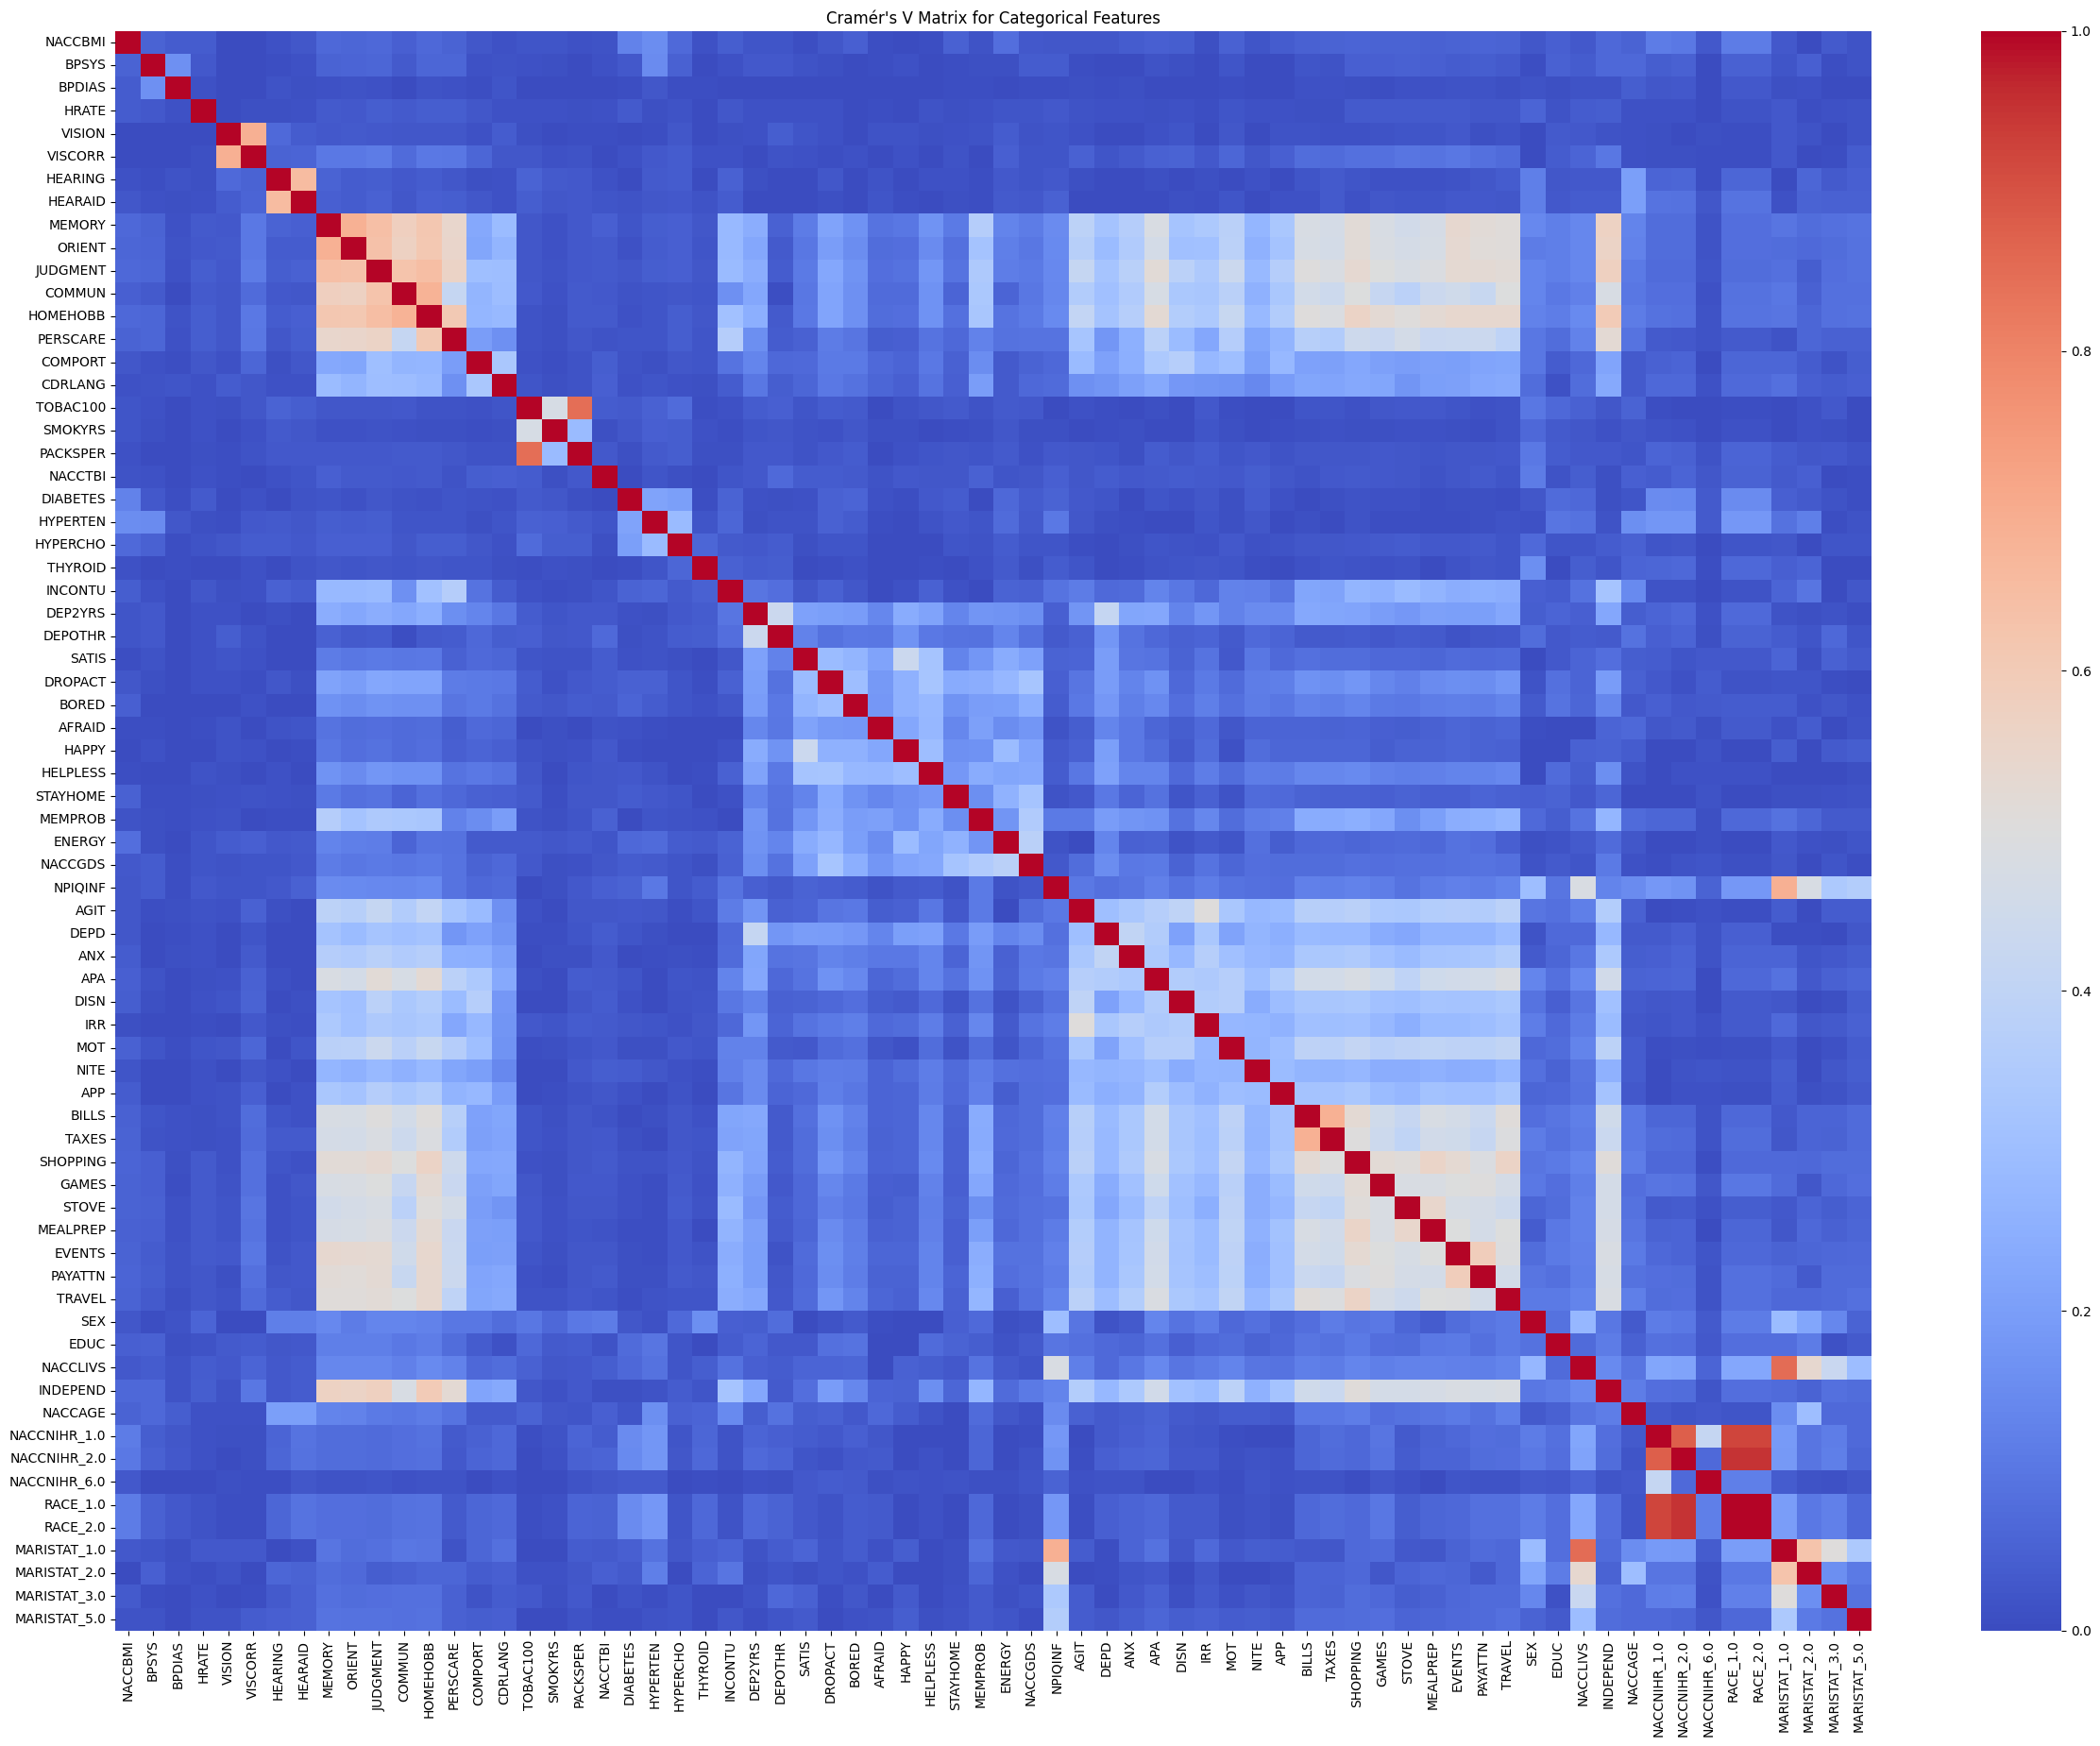

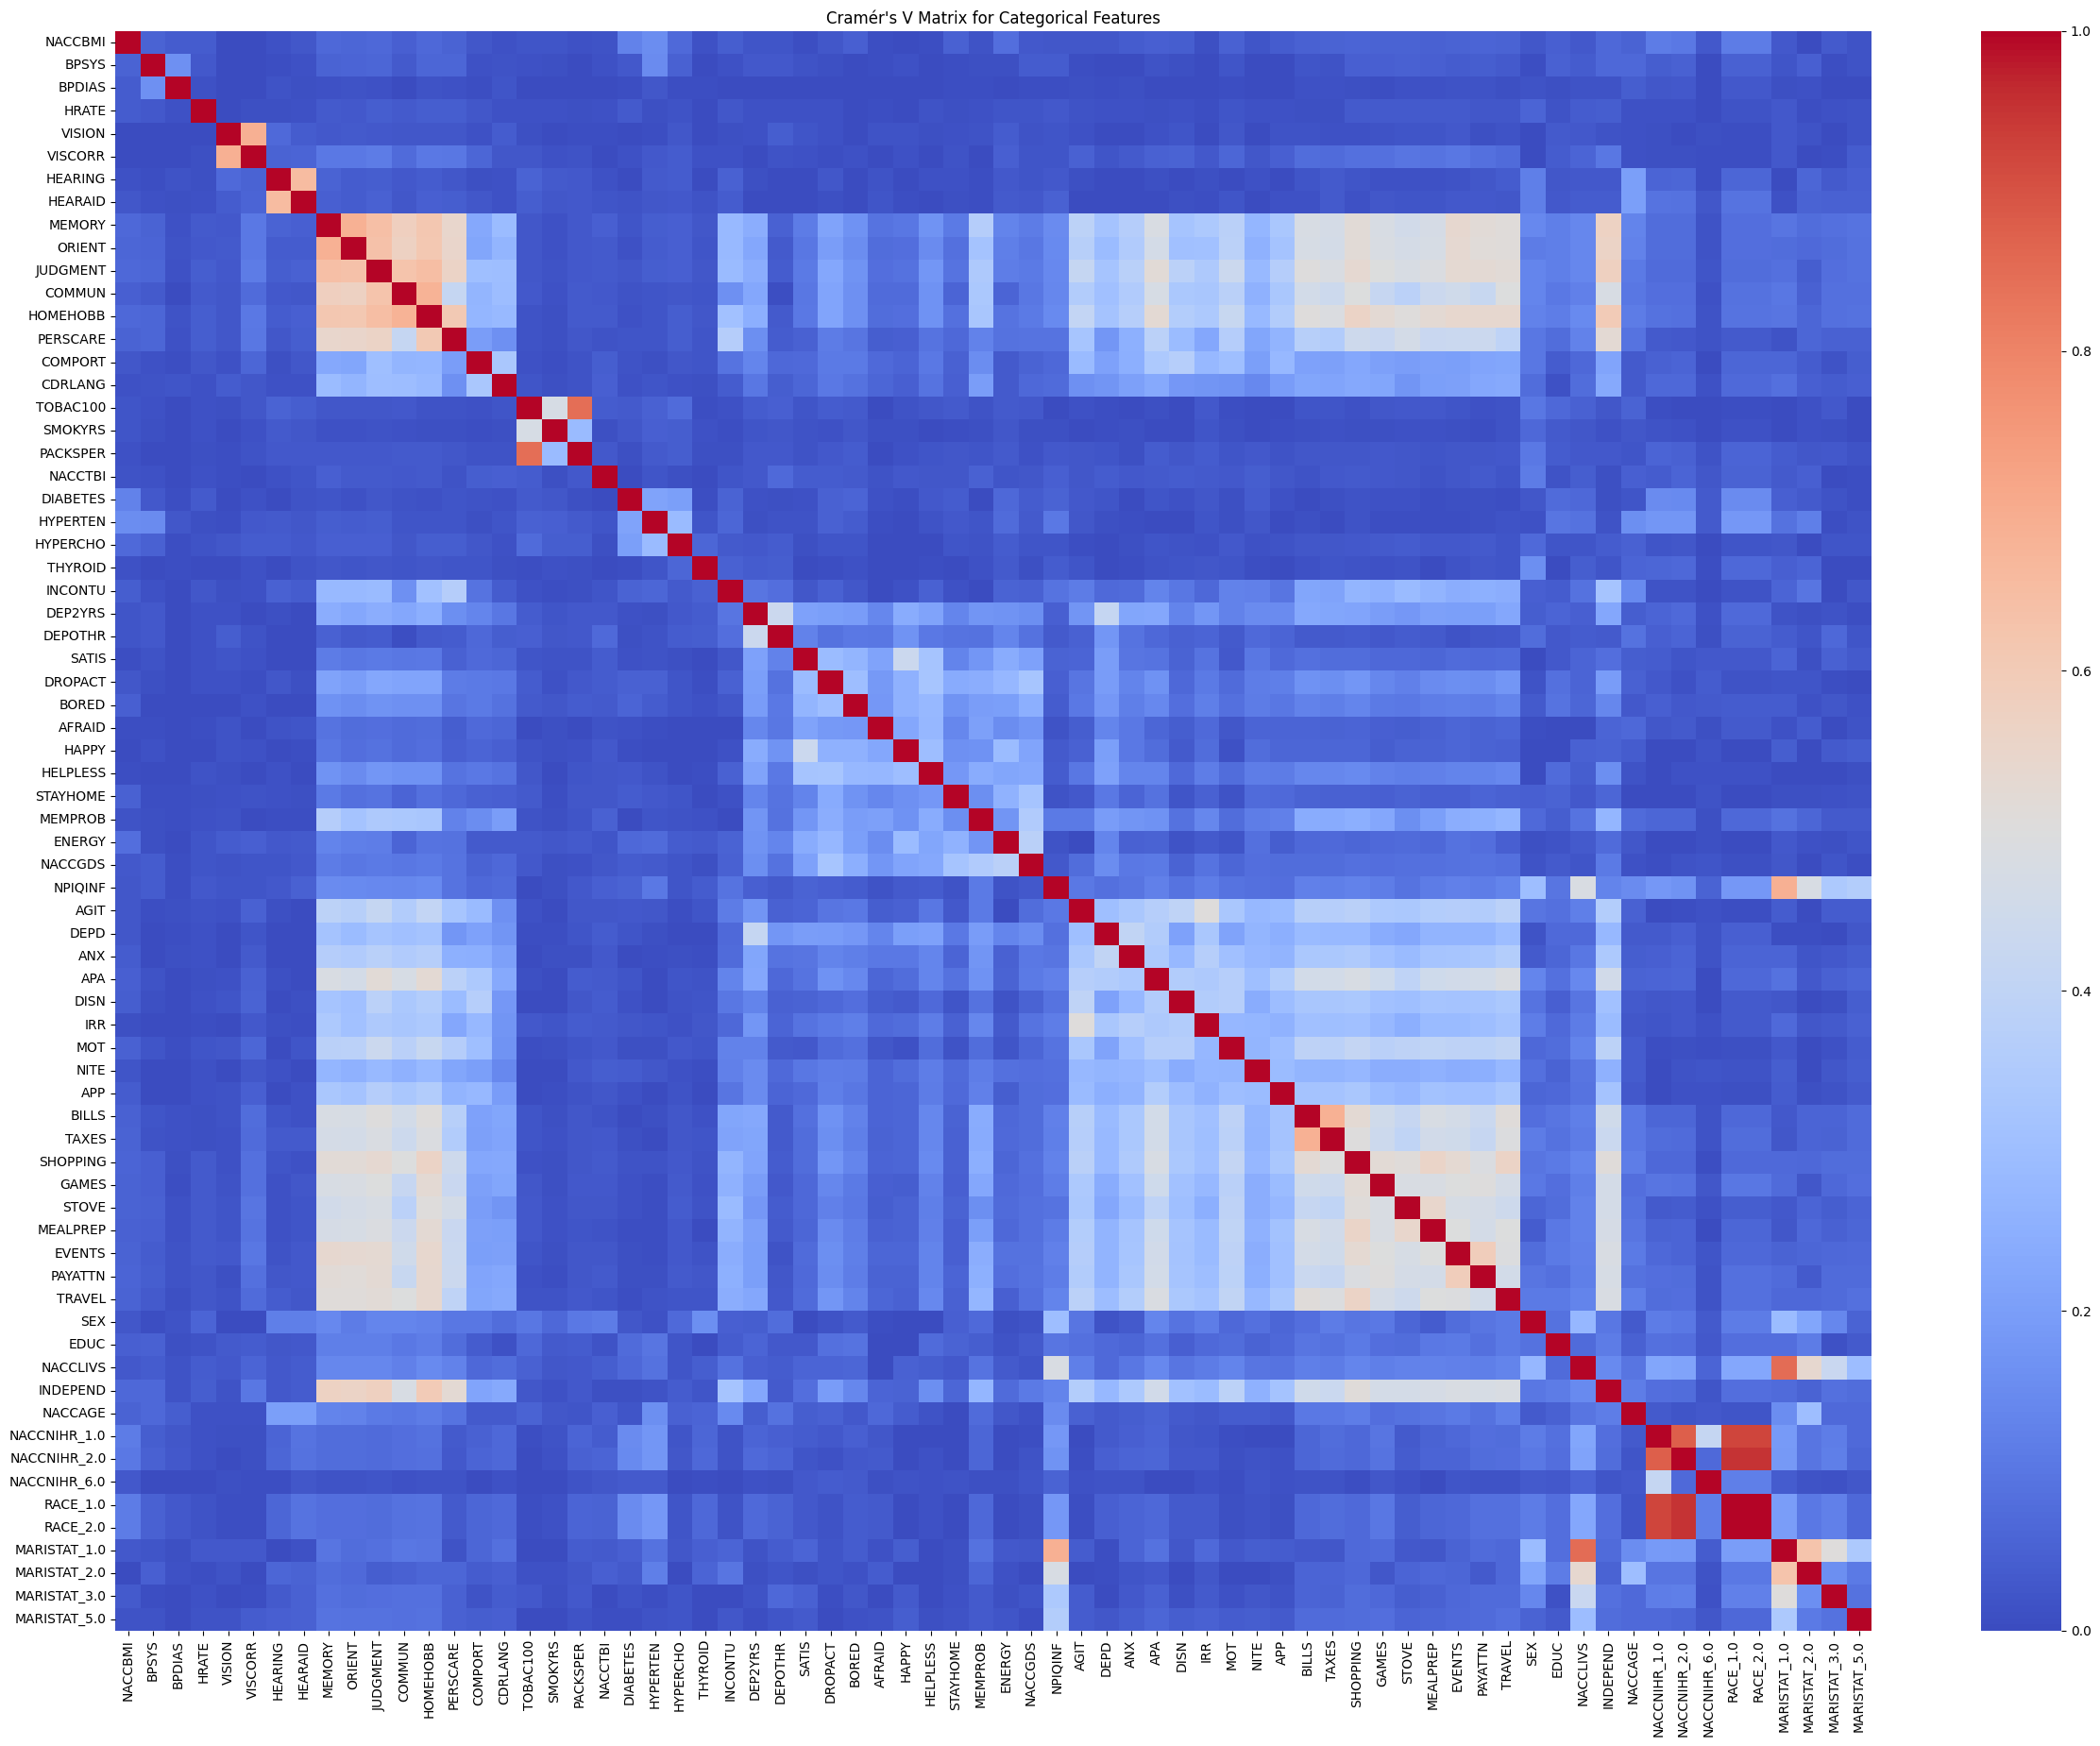

In [35]:
# Split the CN vs. AD data into training and testing sets
CNvsAD_train_set, CNvsAD_test_set, CNvsAD_subjects_with_fourth_visit_label = train_test_data_split(CNvsAD, 'CNvsAD')

# Display the shapes of the training and testing sets
print(CNvsAD_train_set.shape)
print(CNvsAD_test_set.shape)
print(CNvsAD_subjects_with_fourth_visit_label.shape)

# Pre-process the CN vs. AD data, applying various pre-processing steps
CNvsAD_X_train, CNvsAD_y_train = Pre_processing(CNvsAD_train_set, DataName="CNvsAD")

# Pre-process the testing set for CN vs. AD using the pre-processing pipeline
CNvsAD_X_test, CNvsAD_y_test = Pre_processing(CNvsAD_train_set, CNvsAD_test_set, DataName="CNvsAD")

total indices: 33160
test number: 2400
num_indices_to_select: 4232
(26528, 172)
(6632, 172)
(2400, 172)


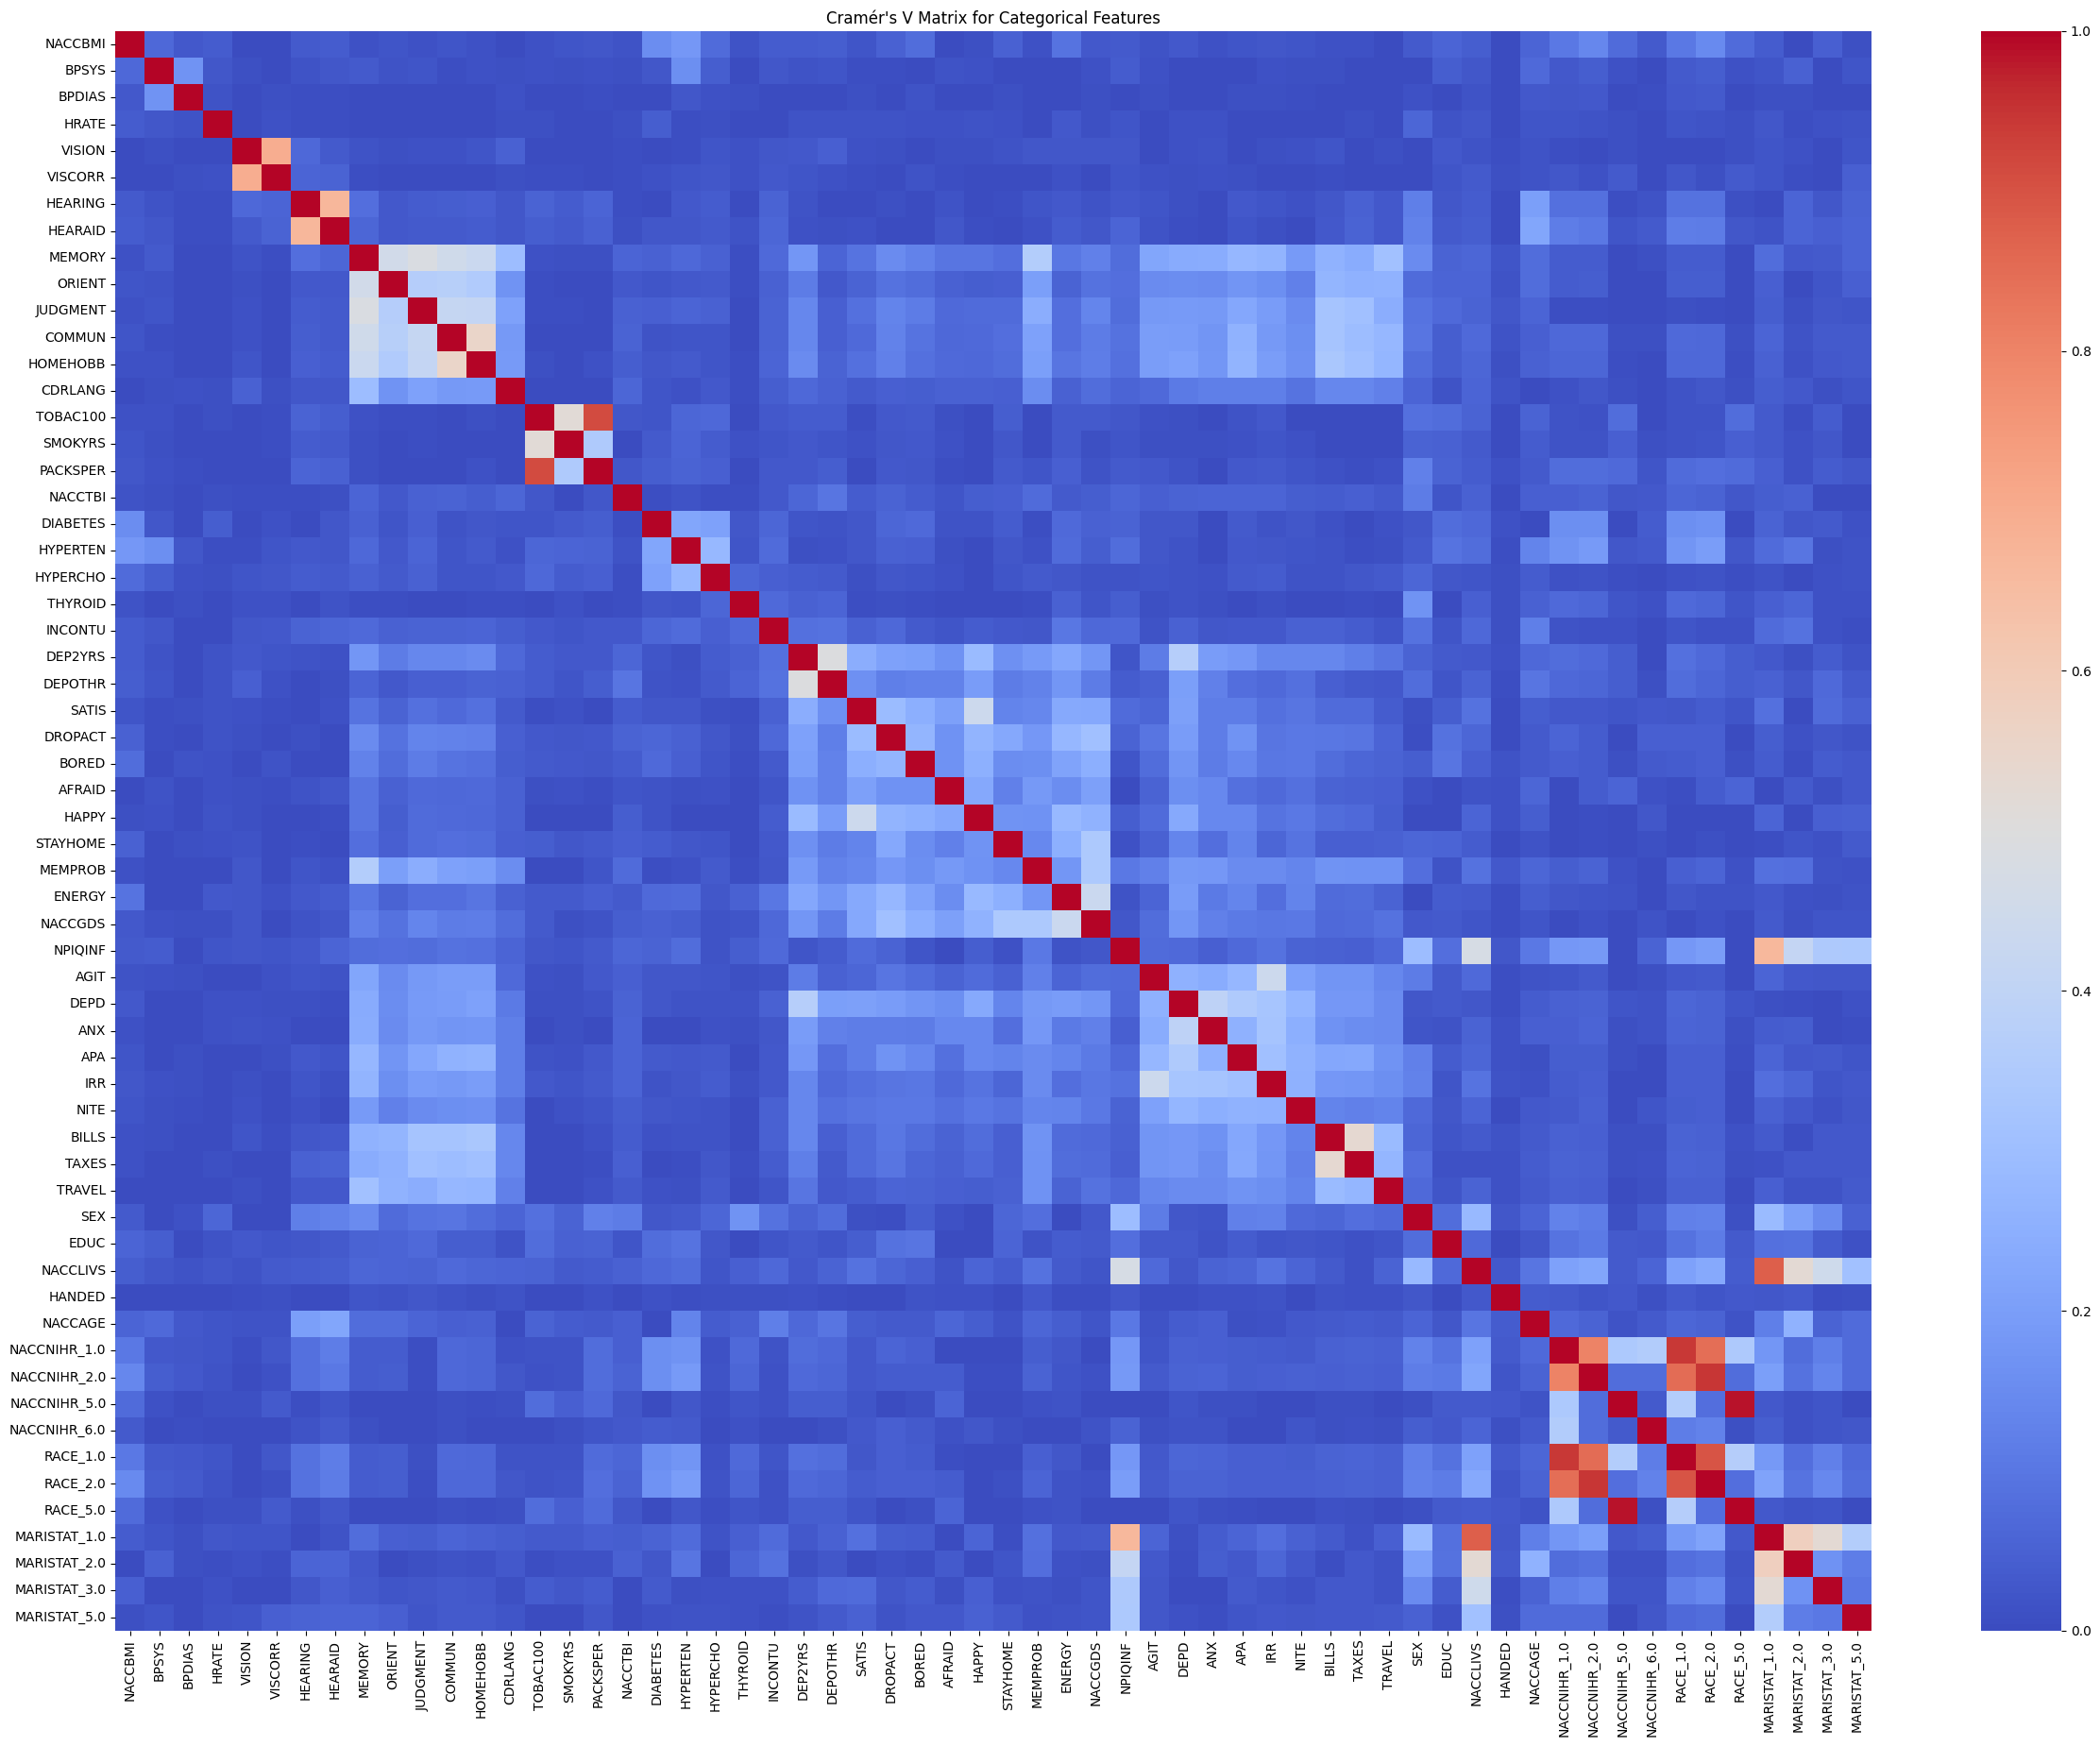

In [ ]:
# Split the CN vs. MCI data into training and testing sets
CNvsMCI_train_set, CNvsMCI_test_set, CNvsMCI_subjects_with_fourth_visit_label = train_test_data_split(CNvsMCI, 'CNvsMCI')

# Display the shapes of the training and testing sets
print(CNvsMCI_train_set.shape)
print(CNvsMCI_test_set.shape)
print(CNvsMCI_subjects_with_fourth_visit_label.shape)

# Pre-process the CN vs. AD data, applying various pre-processing steps
CNvsMCI_X_train, CNvsMCI_y_train = Pre_processing(CNvsMCI_train_set, DataName="CNvsMCI")

# Pre-process the testing set for CN vs. AD using the pre-processing pipeline
CNvsMCI_X_test, CNvsMCI_y_test = Pre_processing(CNvsMCI_train_set, CNvsMCI_test_set, DataName="CNvsMCI")

In [ ]:
# Split the MCI vs. AD data into training and testing sets
MCIvsAD_train_set, MCIvsAD_test_set, MCIvsAD_subjects_with_fourth_visit_label = train_test_data_split(MCIvsAD, 'MCIvsAD')

# Display the shapes of the training and testing sets
print(MCIvsAD_train_set.shape)
print(MCIvsAD_test_set.shape)
print(MCIvsAD_subjects_with_fourth_visit_label.shape)

# Pre-process the CN vs. AD data, applying various pre-processing steps
MCIvsAD_X_train, MCIvsAD_y_train = Pre_processing(MCIvsAD_train_set, DataName="MCIvsAD")


In [ ]:
# Split the CN vs MCI vs AD data into training and testing sets
CNvsMCIvsAD_train_set, CNvsMCIvsAD_test_set, CNvsMCIvsAD_subjects_with_fourth_visit_label = train_test_data_split(CNvsMCIvsAD, 'CNvsMCIvsAD')

# Display the shapes of the training and testing sets
print(CNvsMCIvsAD_train_set.shape)
print(CNvsMCIvsAD_test_set.shape)
print(CNvsMCIvsAD_subjects_with_fourth_visit_label.shape)

# Pre-process the CN vs. AD data, applying various pre-processing steps
CNvsMCIvsAD_X_train, CNvsMCIvsAD_y_train = Pre_processing(CNvsMCIvsAD_train_set, DataName="CNvsMCIvsAD")

# Pre-process the testing set for CN vs. AD using the pre-processing pipeline
CNvsMCIvsAD_X_test, CNvsMCIvsAD_y_test = Pre_processing(CNvsMCIvsAD_train_set, CNvsMCIvsAD_test_set, DataName="CNvsMCIvsAD")

In [ ]:
print(CNvsMCIvsAD_X_train.shape)
print(CNvsMCIvsAD_y_train.shape)
print(CNvsMCIvsAD_X_test.shape)
print(CNvsMCIvsAD_y_test.shape)

In [ ]:
df_64_features = pd.concat([CNvsMCIvsAD_X_train, CNvsMCIvsAD_X_test])

In [ ]:
#EDA
EDA_AD= ProfileReport(df_64_features, title="EDA_AD_Report")
EDA_AD

In [ ]:
EDA_AD.to_file("EDA_AD.html")

# Feature selection using the function "feature selection" utilizing BORUTA

In [ ]:
CNvsAD_selected_features = feature_selection(CNvsAD_X_train, CNvsAD_y_train)
print(CNvsAD_selected_features)

In [ ]:
CNvsMCI_selected_features = feature_selection(CNvsMCI_X_train, CNvsMCI_y_train)
print(CNvsMCI_selected_features)

In [ ]:
MCIvsAD_selected_features = feature_selection(MCIvsAD_X_train, MCIvsAD_y_train)

In [ ]:
CNvsMCIvsAD_selected_features = feature_selection(CNvsMCIvsAD_X_train, CNvsMCIvsAD_y_train)

In [ ]:
CNvsAD_selected_features = np.array(CNvsAD_selected_features)
print(CNvsAD_selected_features )

In [ ]:
CNvsMCI_selected_features = np.array(CNvsMCI_selected_features)
print(CNvsMCI_selected_features)

In [ ]:
MCIvsAD_selected_features = np.array(MCIvsAD_selected_features)
print(MCIvsAD_selected_features)

In [ ]:
CNvsMCIvsAD_selected_features = np.array(CNvsMCIvsAD_selected_features)
print(CNvsMCIvsAD_selected_features )

The features selected are same with Table 9 of the paper.

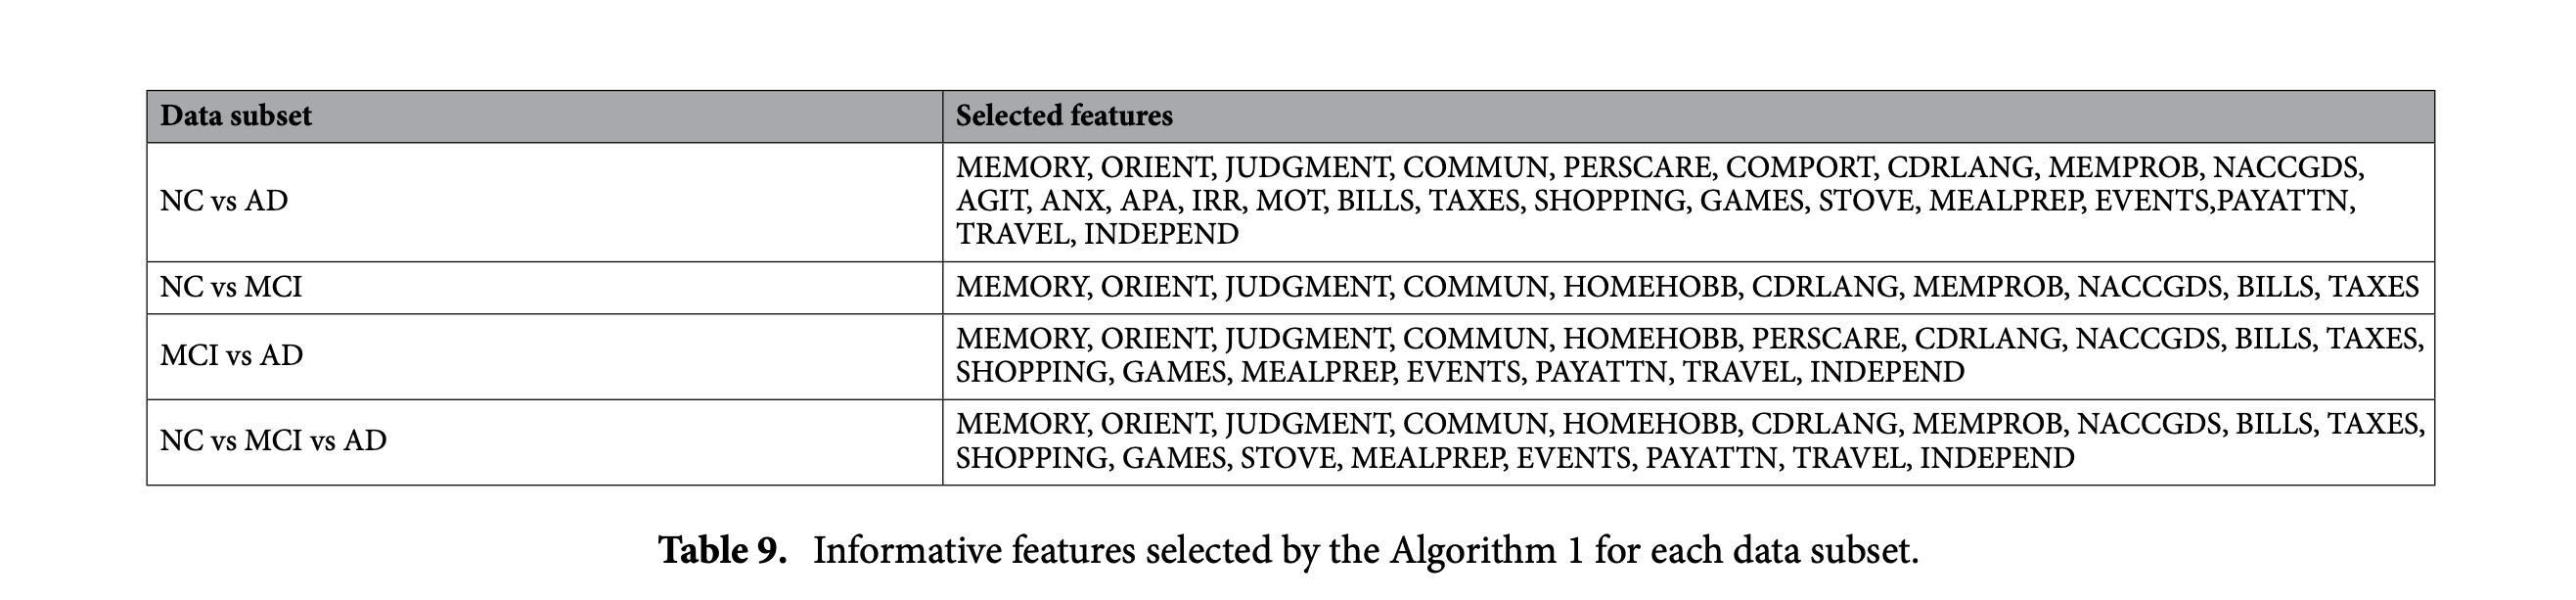

In [ ]:
features_selected = np.concatenate((CNvsAD_selected_features, CNvsMCI_selected_features, MCIvsAD_selected_features, MCIvsAD_selected_features))
features_selected                                

# EXPERIMENT 2



In Experiment 2 (EXP2), ML models with same configuration as EXP1 are trained and evaluated over the reduced feature set (i.e., using the only important features only as identified by Algorithm 1 resulting in selecting 24 feature for NC vs AD subset, 10 for NC vs MCI subset, 17 for MCI vs AD subset and 18 for NC vs MCI vs AD subset (Table 9). This experiment is performed to determine the effectiveness of our feature selection algorithm for the purpose of classifying AD.

## a) NC vs AD - EXP2

In [ ]:
df1 = pd.DataFrame(CNvsAD)

In [ ]:
df1.head()
df1.shape

In [ ]:
X1 = df1[CNvsAD_selected_features]
y1 = df1.NACCUDSD 

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, train_size =0.8, random_state=123)

In [ ]:
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

In [ ]:
CN_AD = TPOTClassifier(verbosity=2, max_time_mins=3, random_state=123)

In [ ]:
CN_AD.fit(X1_train, y1_train)

Best pipeline: GradientBoostingClassifier(MinMaxScaler(input_matrix), learning_rate=0.1, max_depth=10, max_features=0.55, min_samples_leaf=18, min_samples_split=20, n_estimators=100, subsample=1.0)

In [ ]:
print(CN_AD.score(X1_test, y1_test))

## b) NC vs MCI - EXP2

In [ ]:
df2 = pd.DataFrame(CNvsMCI)

In [ ]:
X2 = df2[CNvsMCI_selected_features]
y2 = df2.NACCUDSD 

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, train_size =0.8, random_state=123)

In [ ]:
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

In [ ]:
NC_MCI = TPOTClassifier(verbosity=2, max_time_mins=3, random_state=123)

In [ ]:
NC_MCI.fit(X2_train, y2_train)

Best pipeline: MLPClassifier(input_matrix, alpha=0.01, learning_rate_init=0.01)

In [ ]:
print(NC_MCI.score(X2_test, y2_test))

## c) MCI VS AD - EXP2

In [ ]:
df3 = pd.DataFrame(MCIvsAD)

In [ ]:
X3 = df3[MCIvsAD_selected_features]
y3 = df3.NACCUDSD 

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, train_size =0.8, random_state=123)

In [ ]:
X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape

In [ ]:
MCI_AD = TPOTClassifier(verbosity=2, max_time_mins=3, random_state=123)

In [ ]:
MCI_AD.fit(X3_train, y3_train)

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.35000000000000003, min_samples_leaf=18, min_samples_split=12, n_estimators=100)

In [ ]:
print(MCI_AD.score(X3_test, y3_test))

## d) CN vs MCI vs AD - EXP2

In [ ]:
df4 = pd.DataFrame(CNvsMCIvsAD)

In [ ]:
X4 = df4[CNvsMCIvsAD_selected_features]
y4 = df4.NACCUDSD 

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4, train_size =0.8, random_state=123)

In [ ]:
X4_train.shape, X4_test.shape, y4_train.shape, y4_test.shape

In [ ]:
CN_MCI_AD = TPOTClassifier(verbosity=2, max_time_mins=3, random_state=123)

In [ ]:
CN_MCI_AD.fit(X4_train, y4_train)

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.35000000000000003, min_samples_leaf=18, min_samples_split=12, n_estimators=100)

In [ ]:
print(CN_MCI_AD.score(X4_test, y4_test))

In [ ]:
# Print scores of TPOT AutoML
cn_ad_score = CN_AD.score(X1_test, y1_test)
nc_mci_score = NC_MCI.score(X2_test, y2_test)
mci_ad_score = MCI_AD.score(X3_test, y3_test)
cn_mci_ad_score = CN_MCI_AD.score(X4_test, y4_test)
print("\n")
print(f"{'EXP2-TPOT':<12} {'Accuracy Score':>15}")
print('-' * 30)
print(f"{'CN_AD':<12} {cn_ad_score:>15.4f}")
print(f"{'NC_MCI':<12} {nc_mci_score:>15.4f}")
print(f"{'MCI_AD':<12} {mci_ad_score:>15.4f}")
print(f"{'CN_MCI_AD':<12} {cn_mci_ad_score:>15.4f}")
print("\n")

### Overall, the accuracy achieved using TPOT AutoML for EXP2 are similar to those reported in the paper, but with higher performance.

## Table 2. from page 3 of the paper

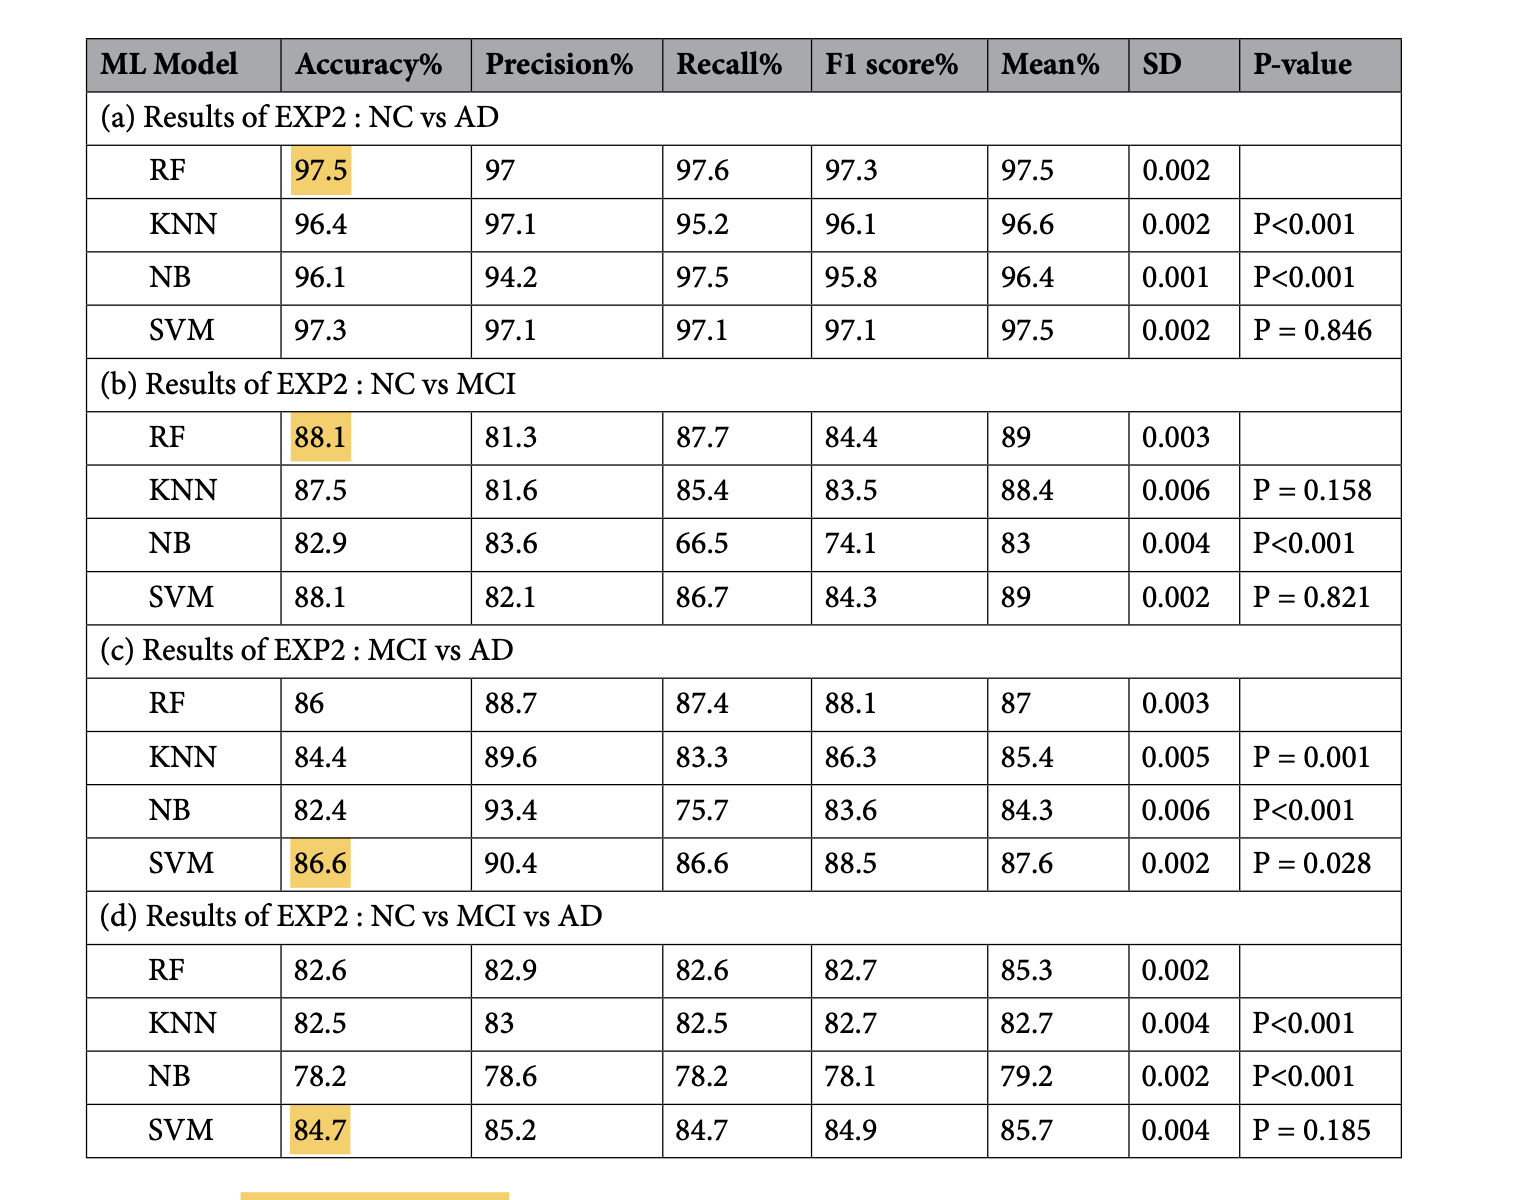

# EXPERIMENT 3

Experiment 3 (EXP3) is a continuation of EXP2, in which the same features are used to train and test the ML models for each data subset. However, instead of classifying the cognitive state of an individual at the base- line visit, 
the task of the ML models is to predict the cognitive state of an individual after four years of baseline visit. This is a crucial experiment, as it will help to determine whether the features that have been identified as important (in Table 9), are effective in predicting the cognitive state of an individual over a longer period of time.

## a) CN vs AD - EXP3

In [ ]:
dfa3= CNvsAD_subjects_with_fourth_visit_label

In [ ]:
dfa3.shape

In [ ]:
print(dfa3.head())

In [ ]:
Xa3 = dfa3[CNvsAD_selected_features]
ya3 = dfa3.NACCUDSD_4

In [ ]:
Xa3_train, Xa3_test, ya3_train, ya3_test = train_test_split(Xa3,ya3, train_size =0.8, random_state=123)

In [ ]:
Xa3_train.shape, Xa3_test.shape, ya3_train.shape, ya3_test.shape

In [ ]:
CN_AD_ex3 = TPOTClassifier(verbosity=2, max_time_mins=3, random_state=123)

In [ ]:
CN_AD_ex3.fit(Xa3_train, ya3_train)

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=100)

In [ ]:
print(CN_AD_ex3.score(Xa3_test, ya3_test))

## b) CN vs MCI - EXP3

In [ ]:
dfb3= CNvsMCI_subjects_with_fourth_visit_label

In [ ]:
print(dfb3.head())
dfb3.shape

In [ ]:
Xb3 = dfb3[CNvsMCI_selected_features]
yb3 = dfb3.NACCUDSD_4

In [ ]:
Xb3_train, Xb3_test, yb3_train, yb3_test = train_test_split(Xb3,yb3, train_size =0.8, random_state=123)

In [ ]:
Xb3_train.shape, Xb3_test.shape, yb3_train.shape, yb3_test.shape

In [ ]:
CN_MCI_ex3 = TPOTClassifier(verbosity=2, max_time_mins=3, random_state=123)

In [ ]:
CN_MCI_ex3.fit(Xb3_train, yb3_train)

Best pipeline: BernoulliNB(DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=9), alpha=0.001, fit_prior=True)

In [ ]:
print(CN_MCI_ex3.score(Xb3_test, yb3_test))

## c) MCI VS AD - EXP 3

In [ ]:
dfc3= MCIvsAD_subjects_with_fourth_visit_label

In [ ]:
dfc3.shape

In [ ]:
Xc3 = dfc3[MCIvsAD_selected_features]
yc3 = dfc3.NACCUDSD_4

In [ ]:
Xc3_train, Xc3_test, yc3_train, yc3_test = train_test_split(Xc3,yc3, train_size =0.8, random_state=123)

In [ ]:
Xc3_train.shape, Xc3_test.shape, yc3_train.shape, yc3_test.shape

In [ ]:
Xc3_train

In [ ]:
Xc3_test

In [ ]:
MCI_AD_ex3 = TPOTClassifier(verbosity=2, max_time_mins=3, random_state=123)

In [ ]:
MCI_AD_ex3.fit(Xc3_train, yc3_train)

Best pipeline: GradientBoostingClassifier(StandardScaler(input_matrix), learning_rate=0.1, max_depth=6, max_features=0.55, min_samples_leaf=18, min_samples_split=9, n_estimators=100, subsample=0.8)

In [ ]:
print(MCI_AD_ex3.score(Xc3_test, yc3_test))

## d) CN vs MCI vs AD - EXP3

In [ ]:
dfd3= CNvsMCIvsAD_subjects_with_fourth_visit_label

In [ ]:
print(dfd3.head())
dfd3.shape

In [ ]:
Xd3 = dfd3[CNvsMCIvsAD_selected_features]
yd3 = dfd3.NACCUDSD_4

In [ ]:
Xd3_train, Xd3_test, yd3_train, yd3_test = train_test_split(Xd3,yd3, train_size =0.8, random_state=123)

In [ ]:
Xd3_train

In [ ]:
Xd3_test

In [ ]:
Xd3_train.shape, Xd3_test.shape, yd3_train.shape, yd3_test.shape

In [ ]:
CN_MCI_AD_ex3 = TPOTClassifier(verbosity=2, max_time_mins=5, random_state=123)

In [ ]:
CN_MCI_AD_ex3.fit(Xd3_train, yd3_train)

Best pipeline: ExtraTreesClassifier(ZeroCount(input_matrix), bootstrap=False, criterion=entropy, max_features=0.6000000000000001, min_samples_leaf=9, min_samples_split=10, n_estimators=100)

In [ ]:
print(CN_MCI_AD_ex3.score(Xd3_test, yd3_test))

In [ ]:
cn_ad_ex3_score = CN_AD_ex3.score(X1_test, y1_test)
cn_mci_ex3_score = CN_MCI_ex3.score(Xb3_test, yb3_test)
mci_ad_ex3_score = MCI_AD_ex3.score(Xc3_test, yc3_test)
cn_mci_ad_ex3_score = CN_MCI_AD_ex3.score(Xd3_test, yd3_test)

# Print the scores 
print('\n')
print(f"{'EXP3 - TPOT':<15} {'Accuracy Score':>18}")
print('-' * 40)
print(f"{'CN_AD_ex3':<15} {cn_ad_ex3_score:>18.4f}")
print(f"{'CN_MCI_ex3':<15} {cn_mci_ex3_score:>18.4f}")
print(f"{'MCI_AD_ex3':<15} {mci_ad_ex3_score:>18.4f}")
print(f"{'CN_MCI_AD_ex3':<15} {cn_mci_ad_ex3_score:>18.4f}")
print('\n')

## Table 3. from page 4 of the paper

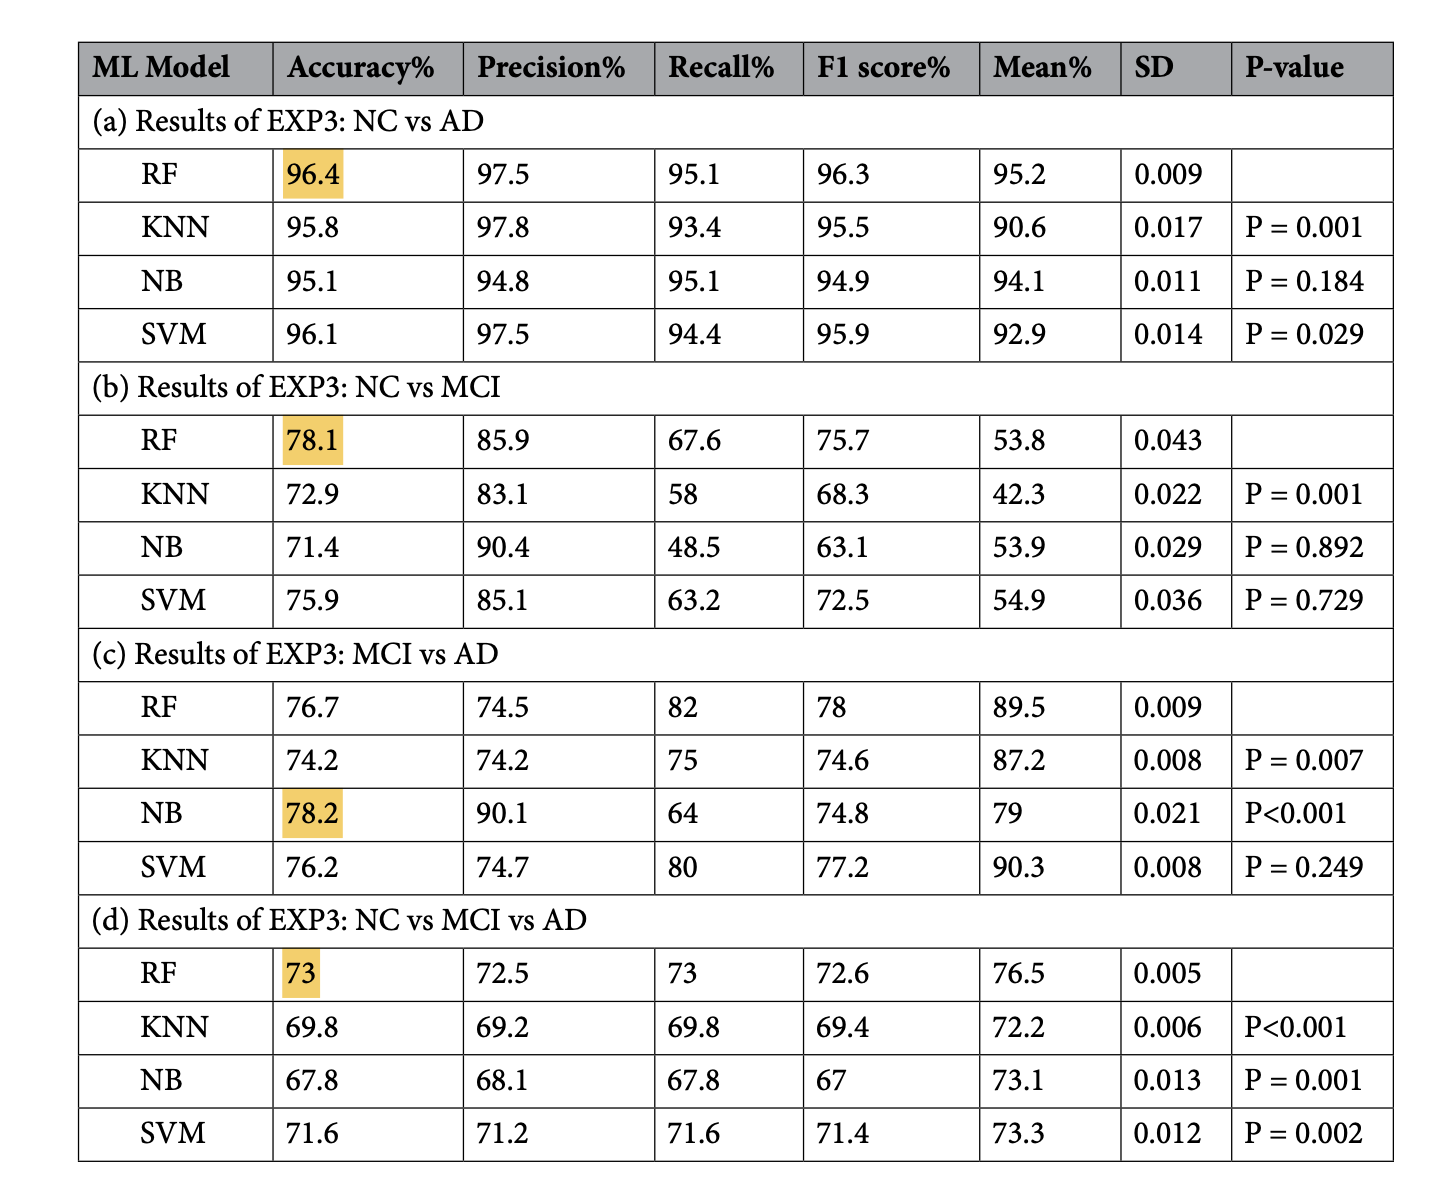

### Overall, the accuracies achieved using TPOT AutoML for EXP3 are similar or higher to those reported in the paper. We observe higher performance with TPOP AutoML